# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

Ось так можемо переглянути, які є листки в Excel файлі:

In [3]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '/Users/dmytro.siaskyi/Documents/Python/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [6]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [7]:
df = pd.read_excel(path_to_file)

In [8]:
pd.set_option("display.max_columns", 32 )

In [9]:
display(df[:5], df.dtypes, df.shape)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

(50447, 32)

In [10]:
df.describe()

,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
count,50447.000000,50447.000000,5.044700e+04,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,5.044700e+04,50447.000000,50447.000000,50447.000000,50447.000000
mean,2017.667968,6.476678,9.893557e+09,18.364263,35.801772,7.424184,1.548179,0.029938,11.167962,66.695212,0.085553,72.378916,0.105550,1.500000e-01,0.744450,1.201682,1.726851,8.583809
std,1.111588,3.454349,7.636461e+07,16.161139,14.020367,4.753588,0.648461,0.014230,9.227162,45.269851,0.023568,49.093636,0.029403,1.321178e-13,0.029403,1.063545,1.426844,7.134957
min,2016.000000,1.000000,7.919903e+09,0.000000,15.000000,0.840000,1.000000,0.010000,0.798000,0.978500,0.060000,1.037210,0.051000,1.500000e-01,0.700000,0.067840,0.126000,0.609840
25%,2017.000000,3.000000,9.839283e+09,6.000000,23.000000,4.280000,1.000000,0.020000,5.213600,35.328000,0.070000,38.615940,0.083000,1.500000e-01,0.722000,0.545600,0.805500,4.082890
50%,2018.000000,7.000000,9.897050e+09,14.000000,35.000000,5.980000,2.000000,0.030000,8.632800,58.586500,0.070000,63.909120,0.109000,1.500000e-01,0.741000,0.928200,1.329000,6.648660
75%,2019.000000,10.000000,9.950153e+09,26.000000,47.000000,9.470000,2.000000,0.040000,14.016000,90.585000,0.100000,98.076440,0.128000,1.500000e-01,0.767000,1.505270,2.178000,10.828800
max,2019.000000,12.000000,9.999984e+09,116.000000,75.000000,40.330000,9.000000,0.050000,299.827200,527.668000,0.120000,559.328080,0.150000,1.500000e-01,0.799000,26.234880,46.848000,239.237120


In [11]:
df.columns

Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')

In [12]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [13]:
df_clean = df.drop_duplicates()

Питання:

1. Який місяць є найбільший за продажами та прибутком?
2. Хто наш покупець? Який його вік і гендер? + A/B тест середнього чеку за гендером
3. Яка маржа для кожної категорії продуктів?
4. Яка категорія продуктів найпопулярніша (за продажами)? 
5. Яка субкатегорія найпопулярніша (за продажами)? 
6. Який метод оплати обирають найчастіше? 
7. Чи є залежність між Loyalty Card Points та розміром чеку?
8. У яку пору доби купують найчастіше?
9. Яка філія є має найбільші продажі?
10. Яка вартість покупок для кожного банку і який середній чек покупки для кожного банку?


1. Який місяць має найбільші продажі і profit margin?

In [15]:
month_sales = df_clean.groupby(['Year' ,'Month'])['Amount'].sum().reset_index()
month_sales

,Year,Month,Amount
0,2016,1,8894.5104
1,2016,2,8814.0834
2,2016,3,8560.6094
3,2016,4,9073.3672
4,2016,5,9226.8476
5,2016,6,9446.1532
6,2016,7,9119.1095
7,2016,8,10139.9460
8,2016,9,9972.7338
9,2016,10,9911.1945


Виведемо місяць за продажами для кожнного року

In [16]:
most_month_sales = month_sales.groupby('Year')['Amount'].idxmax()
most_month_sales = month_sales.loc[most_month_sales]
most_month_sales

,Year,Month,Amount
11,2016,12,11868.1668
23,2017,12,13475.7535
35,2018,12,13532.0331
47,2019,12,19886.9592


Як бачимо - грудень історично виходить місяцем, який має найбільші продажі за всі роки. Можна припустити, що люди у цей час здійснюють передноворічні покупки.

Також можемо подивитись який рік рекордсмен за продажами.

In [17]:
month_sales.groupby('Year')['Amount'].sum()

Year
2016    114414.7572
2017    127756.3058
2018    146441.1509
2019    174774.0301
Name: Amount, dtype: float64

А що до прибутковості? Зробимо такі ж таблички для profit margin

In [18]:
month_profit = df_clean.groupby(['Year' ,'Month'])['Profit Margin'].sum().reset_index()
most_month_profit = month_profit.groupby('Year')['Profit Margin'].idxmax()
most_month_profit = month_profit.loc[most_month_profit]
most_month_profit

,Year,Month,Profit Margin
11,2016,12,1279.95280
23,2017,12,1433.58615
24,2018,1,1448.26854
47,2019,12,2127.02415


Бачимо, що найбільше абсолютне значення прибутковості також припадає на грудень- січень. Проте це показник, який не можна оцінювати в абсолютному виразі, лише у відносному. Тому порахуємо прибутковість у % для кожного місяця і відобразимо це графічно.

In [19]:
sales_and_profit = pd.merge(month_sales, month_profit, on=['Year', 'Month'])
sales_and_profit['Profit margin %'] = sales_and_profit['Profit Margin']/sales_and_profit['Amount']
sales_and_profit['Year-Month'] = sales_and_profit['Month'].astype(str) + '-' + sales_and_profit['Year'].astype(str)

sales_and_profit

,Year,Month,Amount,Profit Margin,Profit margin %,Year-Month
0,2016,1,8894.5104,955.88988,0.107470,1-2016
1,2016,2,8814.0834,959.61641,0.108873,2-2016
2,2016,3,8560.6094,919.01487,0.107354,3-2016
3,2016,4,9073.3672,1004.72152,0.110733,4-2016
4,2016,5,9226.8476,995.47699,0.107889,5-2016
5,2016,6,9446.1532,1026.34306,0.108652,6-2016
6,2016,7,9119.1095,977.47850,0.107190,7-2016
7,2016,8,10139.9460,1091.39936,0.107634,8-2016
8,2016,9,9972.7338,1057.77303,0.106067,9-2016
9,2016,10,9911.1945,1057.56976,0.106705,10-2016


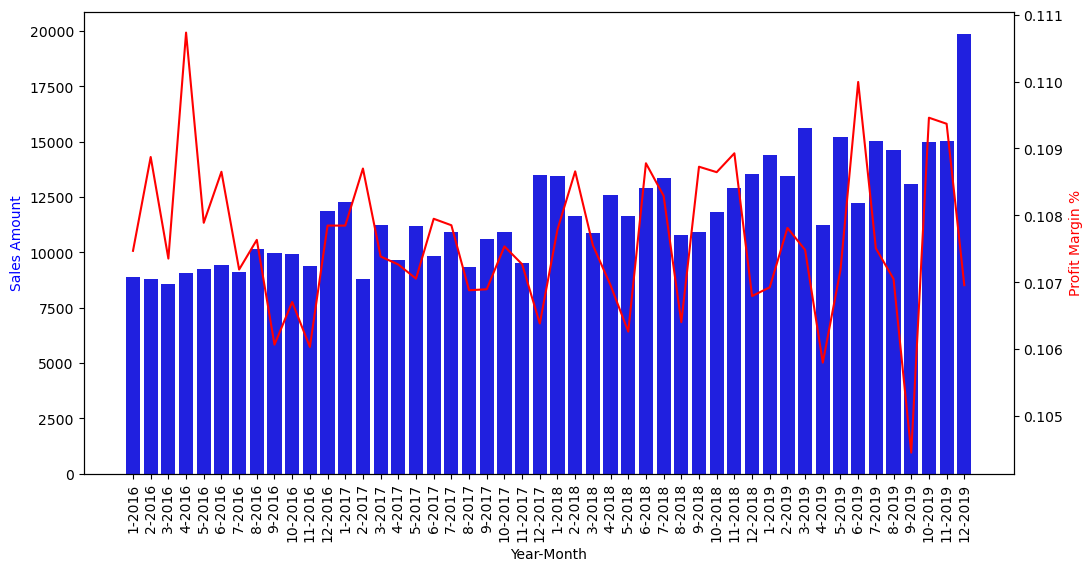

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=sales_and_profit, x='Year-Month', y='Amount', ax=ax1, color='blue')

ax2 = ax1.twinx()

sns.lineplot(data=sales_and_profit, x='Year-Month', y='Profit margin %', ax=ax2, color='red')

ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Sales Amount', color='blue')
ax2.set_ylabel('Profit Margin %', color='red')

ax1.tick_params(axis='x', rotation=90)

plt.show()

В цілому по графіку ми бачимо, що динаміка продажів є повільно зростаючою, також на графіку особливо помітно як ростуть продажі в грудні-січні кожного року. Піковим роком за розміром продажів є 2019, маючи рекордний грудень за весь період. 
Динаміка прибутковості (Profit Margin) виглядає доволі волатильною і досягає свого мінімуму за весь період у вересні 2019 року. І також підтверджується те, що не можна оцінювати прибутковість у абсолютному виразі, адже якраз таки з графіку виглядає, що у пікові на продажі місяці та пікові за абсолютним виразом прибутки не є такими у відносному виразі (у %).

2. Хто наш покупець? Який його вік і гендер? 

In [23]:
"""Як бачимо - у нас під один чек може бути декілька записів, тому це варто враховувати в майбутньому для уникнення диблікації даних, 
або неправильного рахунку
"""

df_clean.groupby('Gender')['Receipt Number'].value_counts()

Gender  Receipt Number
Female  GMK02436          14
        GPM02685          14
        GIJ01211          13
        GSB02029          13
        GIJ01689          12
                          ..
Male    GSW01380           1
        GSW01410           1
        GSW01414           1
        GSW01519           1
        GSW01531           1
Name: Receipt Number, Length: 13048, dtype: int64

In [25]:
customer = df_clean.pivot_table(
    index='Age', 
    columns='Gender', 
    values='Receipt Number', 
    aggfunc='nunique')

customer

Gender,Female,Male
Age,,
15,217.0,40.0
16,329.0,47.0
17,307.0,87.0
18,338.0,81.0
19,349.0,59.0
...,...,...
71,37.0,15.0
72,39.0,5.0
73,24.0,7.0


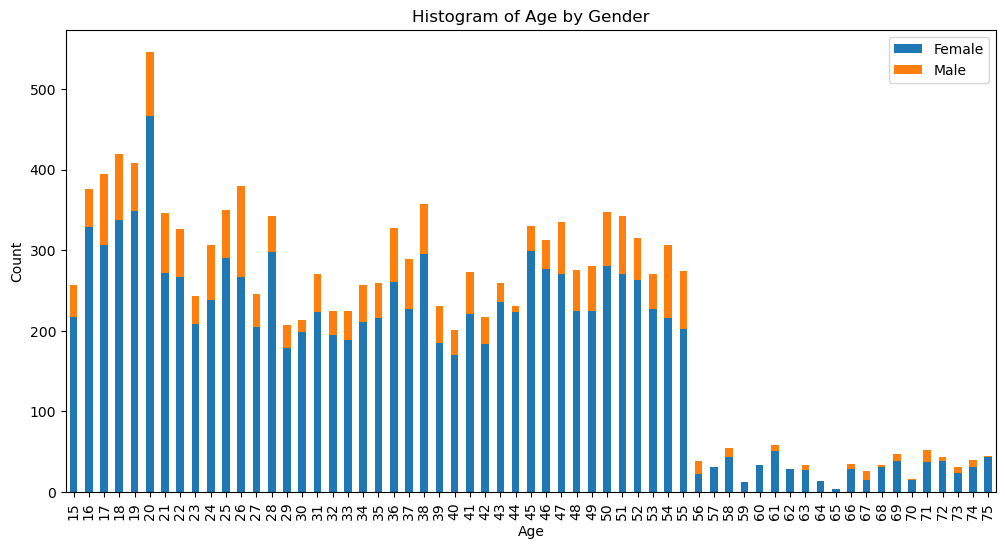

In [26]:
customer.plot(kind='bar', stacked=True, figsize=(12, 6));
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Gender')
plt.legend()
plt.show()

Створити новий дата фрейм, у якому дані будуть згруповані за одним чеком і потім для більшої зручності категорізуємо людей за віковими групами - '18-25', '26-35', '36-45', '46-55', '56+'

In [27]:
grouped_by_receipt = df_clean.groupby('Receipt Number')['Age'].unique().reset_index()
grouped_by_receipt ['Gender'] = df_clean.groupby('Receipt Number')['Gender'].first().values
grouped_by_receipt 

,Receipt Number,Age,Gender
0,GIJ00001,[36],Male
1,GIJ00002,[54],Male
2,GIJ00003,[16],Female
3,GIJ00004,[20],Female
4,GIJ00005,[49],Male
...,...,...,...
13043,GSW01531,[20],Male
13044,GSW01532,[35],Female
13045,GSW01533,[28],Female
13046,GSW01534,[28],Female


In [28]:
age_bins = [0,18, 26, 36, 46, 56, 75]
age_labels = ['<18','18-25', '26-35', '36-45', '46-55', '56+']

grouped_by_receipt['Age Group'] = pd.cut(grouped_by_receipt['Age'], bins=age_bins, labels=age_labels)

customer_grouped = grouped_by_receipt.pivot_table(index='Age Group', columns='Gender', values='Age', aggfunc='count', margins= True)

print(customer_grouped)

Gender     Female  Male    All
Age Group                     
<18          1191   255   1446
18-25        2357   549   2906
26-35        2175   395   2570
36-45        2317   384   2701
46-55        2200   586   2786
56+           548    91    639
All         10788  2260  13048


А що до вартості покупок відповідно до гендеру?

In [29]:
df_clean['Age Group'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels)

gender_check_value = df_clean.pivot_table(index='Age Group', columns='Gender', values='Amount', aggfunc='sum', margins= True)

def format_with_thousands_separator(x):
    if isinstance(x, (int, float)):
        return '{:,.0f}'.format(x)  
    else:
        return x

gender_check_value = gender_check_value.applymap(format_with_thousands_separator)

display(gender_check_value)

/var/folders/zl/bwysq3tn1kx6l6hdmp9mxqtm0000gn/T/ipykernel_59049/2306853646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age Group'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels)


Gender,Female,Male,All
Age Group,,,
<18,"53,445","10,523","63,968"
18-25,"100,573","21,910","122,483"
26-35,"96,114","16,083","112,196"
36-45,"101,382","14,588","115,971"
46-55,"94,102","26,641","120,743"
56+,"23,583","4,441","28,024"
All,"469,200","94,186","563,386"


Як бачимо - основну частку займають жінки віком 18-25 р. за кількістю покупок, проте за їх вартістю - лідирують жінки віком 35-45 років. Серед чоловіків лідирує категорія 46-65 р. 

Знайдемо середній чек за гендером. 

In [30]:
df_clean.groupby('Gender')['Gross Bill Amount'].mean()

Gender
Female    72.809194
Male      70.299996
Name: Gross Bill Amount, dtype: float64

Проведемо A/B тест, щоб визначити чи дорівнююці середні чеки для обох гендерів чи все таки різниця є?

Сформулюємо гіпотезу:

H0 72.809194 = 70.299996

H1 72.809194 != 70.299996

In [31]:
female_checks = df_clean[df_clean['Gender'] == 'Female']['Gross Bill Amount']
male_checks = df_clean[df_clean['Gender'] == 'Male']['Gross Bill Amount']

In [33]:
t_stat, p_value = stats.ttest_ind(female_checks, male_checks)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average check amount.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average check amount.")

Reject the null hypothesis. There is a significant difference in average check amount.


Таким чином, можемо стверджувати, що все таки середній чек жінок вищий за середній чек чоловіків.

3. Яка маржа для кожної категорії продуктів?

Запевнимось що кожна субкатегорія продуктів має унікальне значення %Profit Margin. 

In [35]:
pd.set_option("display.max_rows", 100 )
category_profit_margin = df_clean.groupby(['Category','Sub_Category'])['% Profit Margin'].unique().reset_index()
category_profit_margin

,Category,Sub_Category,% Profit Margin
0,Bakery & Breakfast,Cereal & Protein Bars,[0.13]
1,Bakery & Breakfast,Fresh Bread,[0.075]
2,Bakery & Breakfast,"Jams, Honey & Spreads",[0.148]
3,Bakery & Breakfast,Oatmeals,[0.114]
4,Bakery & Breakfast,Pastries & Treats,[0.105]
5,Bakery & Breakfast,Sliced Bread,[0.144]
6,Beauty,Bath & Body,[0.094]
7,Beauty,Oral Care,[0.115]
8,Beauty,skin care,[0.085]
9,Beverages,"Chocolate, Malt & Hot Cereals",[0.082]


Та виведемо, яка субкатегорія є найбільш прибутковою для кожної категорії, і заодно відфільтруємо їх у порядку спадання. щоб подивитись яка категорія є найбільш прибутковою.

In [36]:
max_profit_margin_idx = df_clean.groupby('Category')['% Profit Margin'].idxmax()
max_category_profit_margin = df_clean.loc[max_profit_margin_idx].reset_index()
max_category_profit_margin[['Category', 'Sub_Category', '% Profit Margin']].sort_values(by='% Profit Margin', ascending=False)

,Category,Sub_Category,% Profit Margin
2,Beverages,Iced Tea,0.150
3,"Choco, Snacks, Sweets",Biscuits & Crackers,0.150
5,Frozen,Bread & Pasteries,0.150
0,Bakery & Breakfast,"Jams, Honey & Spreads",0.148
13,Pet Care,Dog Food & Trat,0.148
6,Fruit & Vegetable,Frozen Fruits,0.147
10,Meat & Seafood,Fresh Seafood,0.138
11,Mother & Baby,Milk Formula,0.138
4,"Dairy, Chilled & Eggs",cheese,0.133
8,Household,Air Care,0.128


Таким чином, ми визначили, що найбільшу маржинальність 15% мають категорії Beverages(Iced Tea); Choco, Snacks, Sweets('Biscuits & Crackers' ); i Frozen (Bread & Pasteries). Найменшу маржинальність 10.3% має Health (Vitamins & Suppliments).

4. Після цього стає цікаво, яка ж категорія є найбільш популярною за продажами? Зобразимо це за допомогою pie chart

In [37]:
#Спочатку визначимо категорію. 
category_sales = df_clean.groupby(['Category'])['Amount'].sum().reset_index()
total_amount = df_clean['Amount'].sum()
category_sales['Share of total, %'] = category_sales['Amount']/total_amount *100
category_sales.sort_values(by='Share of total, %', ascending=False)

,Category,Amount,"Share of total, %"
1,Beauty,79185.5923,14.055294
5,Frozen,74296.7194,13.187528
0,Bakery & Breakfast,53162.5921,9.436260
10,Meat & Seafood,38975.0958,6.918006
6,Fruit & Vegetable,36783.0941,6.528930
11,Mother & Baby,36549.9824,6.487553
13,Pet Care,35699.7611,6.336641
4,"Dairy, Chilled & Eggs",35460.4534,6.294164
15,"Wines, Beers & Spirits",34641.1768,6.148744
2,Beverages,27042.0524,4.799914


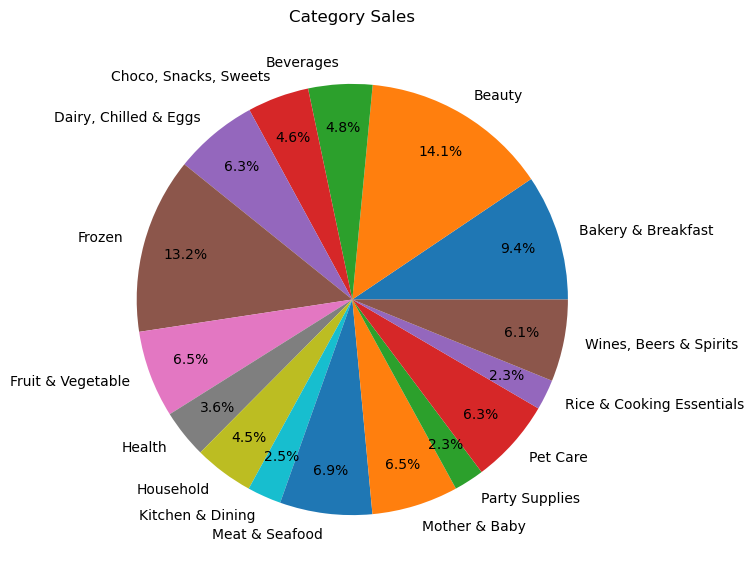

In [40]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(data=category_sales, x = 'Share of total, %', labels = 'Category',autopct='%.1f%%',pctdistance = 0.8)
plt.title('Category Sales');

Отримали цікавий результат - категорія Beauty приносить найбільшу виручку, далі по рейтингу йде категорії Frozen та Bakery & Breakfast	

5. Яка субкатегорія найпопулярніша у рамках кожної категорії (за продажами)? 

In [41]:
category_sales = df_clean.groupby(['Category','Sub_Category'])['Amount'].sum().reset_index()
category_sales.sort_values(by=['Category', 'Amount'], ascending=True)

,Category,Sub_Category,Amount
2,Bakery & Breakfast,"Jams, Honey & Spreads",7214.0607
4,Bakery & Breakfast,Pastries & Treats,7403.8622
0,Bakery & Breakfast,Cereal & Protein Bars,7533.8366
3,Bakery & Breakfast,Oatmeals,8033.9547
5,Bakery & Breakfast,Sliced Bread,8341.0603
1,Bakery & Breakfast,Fresh Bread,14635.8176
6,Beauty,Bath & Body,10590.4719
7,Beauty,Oral Care,30877.1911
8,Beauty,skin care,37717.9293
10,Beverages,Iced Tea,1822.9541


Таким чином можемо подивитись яка субкатегорія приносить найбільшу виручку у рамках категорій. 

6. Який метод оплати обирають найчастіше? 

In [42]:
df_clean.groupby('Payment Mode')['Amount'].sum()

Payment Mode
Card      194653.751
Cash      179878.633
Wallet    188853.860
Name: Amount, dtype: float64

Як бачимо, найчастіше розраховуються картою і найменше - готівкою.

7. Чи є залежність між Loyalty Card Points та розміром чеку?

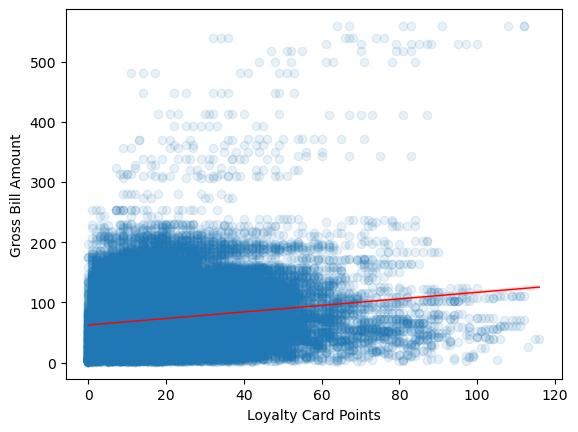

In [43]:
sns.regplot(x='Loyalty Card Points', y='Gross Bill Amount', data=df_clean, line_kws={'color':'red', 'lw':'1'}, scatter_kws={'alpha': 0.1});

In [44]:
correlation_description = {
    (0.90, 1.00): 'Very high positive correlation',
    (-1.00, -0.90): 'Very high negative correlation',
    (0.70, 0.90): 'High positive correlation',
    (-0.90, -0.70): 'High negative correlation',
    (0.50, 0.70): 'Moderate positive correlation',
    (-0.70, -0.50): 'Moderate negative correlation',
    (0.30, 0.50): 'Low positive correlation',
    (-0.50, -0.30): 'Low negative correlation',
    (0.00, 0.30): 'Negligible correlation',
    (-0.30, -0.00): 'Negligible correlation'
}

In [45]:
correlation = df_clean['Loyalty Card Points'].corr(df_clean['Gross Bill Amount'])

for (start, end), description in correlation_description.items():
    if start <= correlation <= end:
        print(f"Correlation {correlation} falls in the range of {description}")
        break

Correlation 0.17858578332529204 falls in the range of Negligible correlation


8. У яку пору доби купують найчастіше?

In [46]:
df_clean['Hour'] = df_clean['Time'].apply(lambda x: x.hour)
df_clean['Hour']

/var/folders/zl/bwysq3tn1kx6l6hdmp9mxqtm0000gn/T/ipykernel_59049/3610562164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hour'] = df_clean['Time'].apply(lambda x: x.hour)


0        10
1        15
2        11
3        11
4        11
         ..
50442    20
50443    13
50444    10
50445    10
50446    10
Name: Hour, Length: 50446, dtype: int64

In [47]:
rush_hour = df_clean.groupby('Hour')['Receipt Number'].nunique()
rush_hour

Hour
10    1109
11    1049
12    1106
13    1153
14    1075
15    1112
16    1088
17    1071
18    1099
19    1123
20    1154
21    1123
Name: Receipt Number, dtype: int64

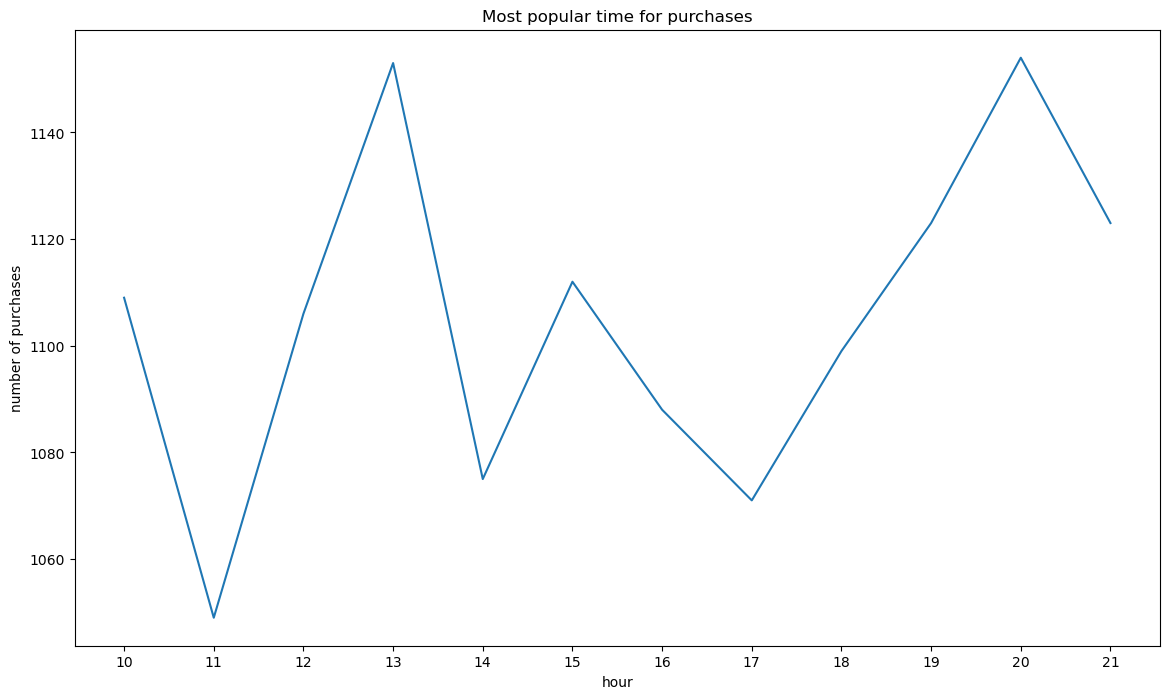

In [48]:
fig, ax = plt.subplots(figsize=(14, 8))
rush_hour.plot()
plt.xlabel ('hour')
plt.ylabel ('number of purchases')
plt.title ("Most popular time for purchases")
plt.xticks(ticks= rush_hour.index);

Як бачимо, найбільша кількість покупок здійснюється у обідній та вечірній час.

9. Яка філія є має найбільші продажі?

In [49]:
df_clean.groupby('Country')['Amount'].sum()

Country
Indonesia      103013.6017
Malaysia       121219.3545
Philippines    133987.4984
Singapore      205165.7894
Name: Amount, dtype: float64

Найбільшиу виручку показує Сінгапурська філія.

10. Яка вартість покупок дл кожного банку і який середній чек покупки для кожного банку?

In [50]:
#додамо додаткову умову до попереднього запиту, щоб подивитись чи є спільні банки для цих країн?
df_clean.groupby(['Country', 'Bank Name'])['Amount'].sum()

Country      Bank Name               
Indonesia    BDO Unibank                 25462.8363
             Enterprise Bank             18053.9369
             ING Bank                    19190.4966
             Philippine National bank    17584.8417
             Philippine Veterans Bank    22721.4902
Malaysia     BDO Unibank                 24622.5297
             Enterprise Bank             24235.7517
             ING Bank                    22353.5519
             Philippine National bank    26343.5604
             Philippine Veterans Bank    23663.9608
Philippines  BDO Unibank                 26309.2586
             Enterprise Bank             28431.2937
             ING Bank                    24852.3513
             Philippine National bank    30078.3221
             Philippine Veterans Bank    24316.2727
Singapore    ALLIANCE Bank                 613.1755
             Affin Bank                    268.2368
             Agrobank                      428.9252
             BDO Unibank  

In [51]:
banks = df_clean.groupby('Bank Name')['Amount'].sum()
banks.sort_values(ascending = False)

Bank Name
BDO Unibank                 123412.0572
Philippine National bank    114403.1678
Philippine Veterans Bank    112830.8096
Enterprise Bank             108205.5644
ING Bank                    100785.2058
Cash                          1007.0970
Deutsche Bank                  667.6835
ALLIANCE Bank                  613.1755
Agrobank                       428.9252
Affin Bank                     268.2368
Bank Central Asia              221.3689
Philtrust Bank                 205.5686
Bank Rakhyat                   169.1141
Robinsons Bank                 168.2696
Name: Amount, dtype: float64

Можна припустити, що найбільшими банками у регіоні є BDO Unibank та Philippine National bank.

In [52]:
bank_check_average = df_clean.groupby('Bank Name')['Gross Bill Amount'].mean()
bank_check_average.sort_values(ascending = False)

Bank Name
Robinsons Bank              121.328108
ALLIANCE Bank                80.455307
Deutsche Bank                79.614672
Philippine Veterans Bank     73.465122
Philippine National bank     73.249154
Enterprise Bank              72.657929
ING Bank                     72.265202
BDO Unibank                  70.612538
Cash                         68.210491
Affin Bank                   61.966963
Philtrust Bank               61.846257
Agrobank                     53.307555
Bank Central Asia            46.016563
Bank Rakhyat                 25.579741
Name: Gross Bill Amount, dtype: float64

Як бачимо, найбільший середній чек має банк Robinsons Bank. Можна припустити, шо покупці цього банку є більш заможиним за інші, але можливо, що там є викид у данних. Це можна перевірити за допомогою візуалізації на box plot. 

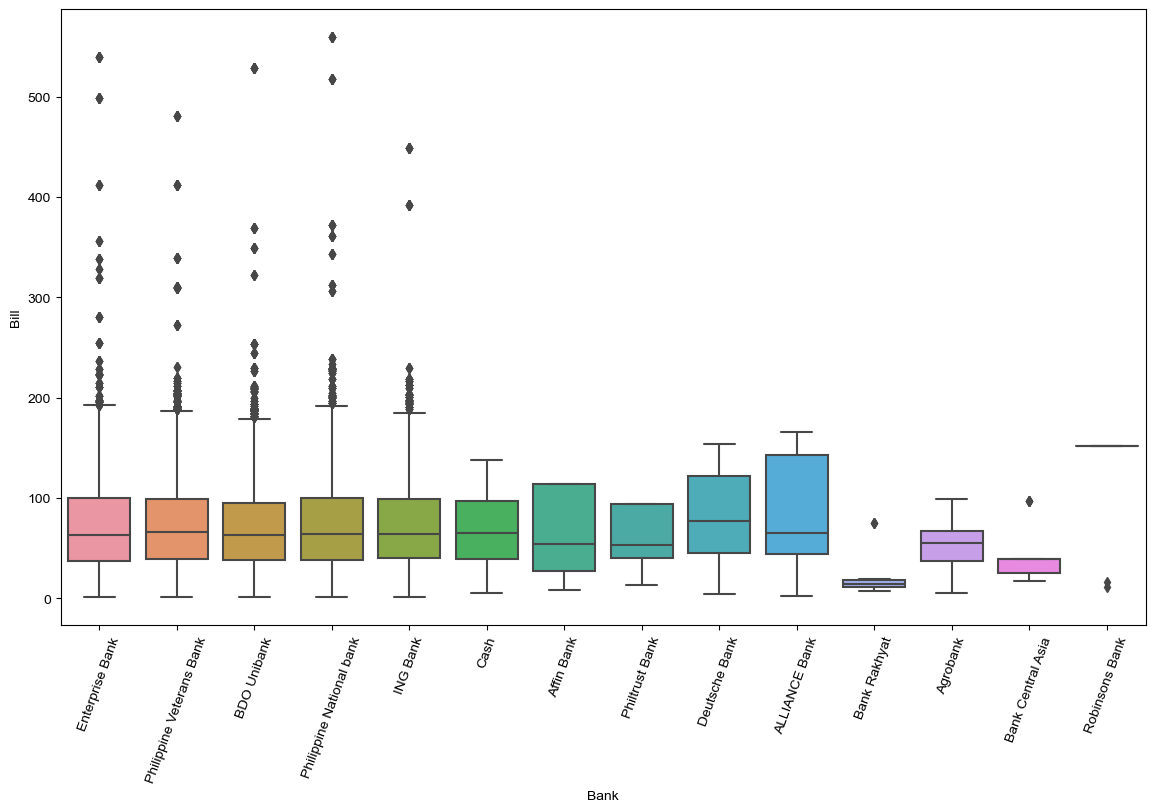

In [53]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.set_style('whitegrid') 
sns.set_palette('bright') 
sns.boxplot(data = df_clean, x = 'Bank Name', y = 'Gross Bill Amount')
plt.xlabel ('Bank')
plt.ylabel('Bill')
plt.xticks(rotation = 70);

Без візуалізації можна було б припуститись хибної гіпотези щодо того, що Robinson Bank має вищий показник середнього чеку ніж інші банки, проте видно, що даниз для аналізу мало, і взагалі це не популярний банк для розрахунків.Перші 6 банків зліва на графіку в цілому дуже схожі по показникам чеку. Тому не можна зробити однозначних висновків щодо клієнтів банку. 

В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**